## MST (Minimum Spanning Tree)

Implementation of Prim and Kruskal algorithm with the support of [Networkx](https://networkx.org/) for drawing graphs.

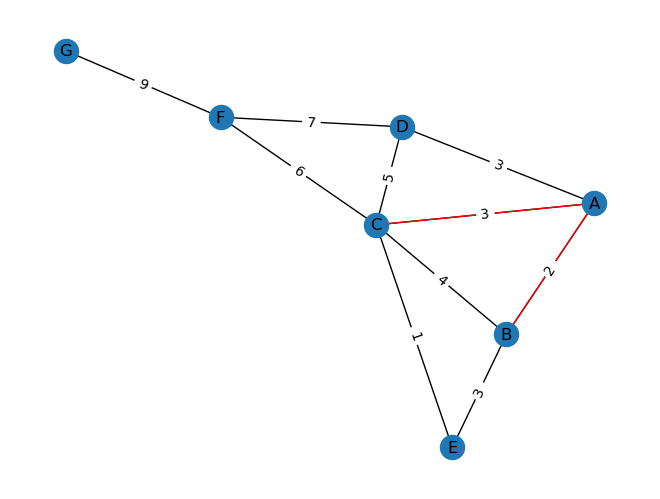

In [2]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_graph(graph: list, selected: list):
    """
    Takes the whole graph to draw and the selected connections by index
    """
    # Create a graph
    G = nx.Graph()

    # extract list of nodes based on the connections and merge from and to into a single set
    from_nodes = {node[0] for node in graph}
    to_nodes = {node[1] for node in graph}
    nodes = from_nodes.union(to_nodes)

    # Add nodes to the graph
    G.add_nodes_from(nodes)

    # Add connections to the graph
    for from_node, to_node, weight in graph:
        G.add_edge(from_node, to_node, weight=weight)

    # Calculate positions for nodes
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)

    # Add highlighted connections
    nx.draw_networkx_edges(G, pos, edgelist=selected, edge_color="r")

    # Draw edge labels with weights
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.show()


G = [
    ["A", "B", 2],
    ["A", "C", 3],
    ["A", "D", 3],
    ["B", "C", 4],
    ["B", "E", 3],
    ["C", "D", 5],
    ["C", "E", 1],
    ["C", "F", 6],
    ["D", "F", 7],
    ["F", "G", 9],
]

selected = [G[0], G[1]]

draw_graph(G, selected)

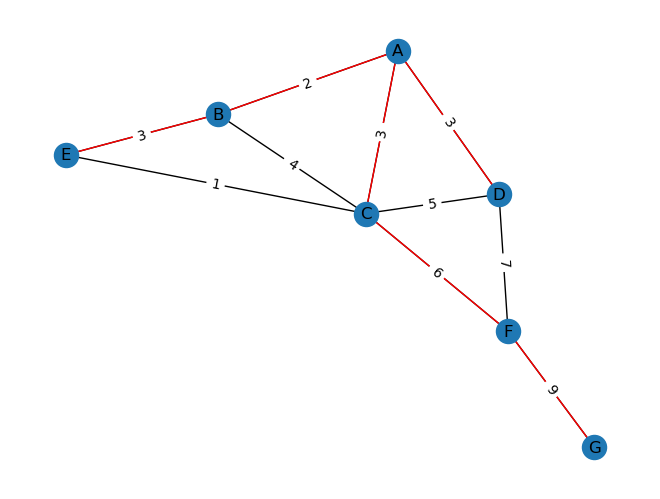

In [3]:
def prim(graph: list, start_node: str) -> list:
    from_nodes = {(node[0]) for node in graph}
    to_nodes = {node[1] for node in graph}
    nodes = from_nodes | to_nodes

    visited_nodes = {start_node}
    result = []

    while len(visited_nodes) < len(nodes):
        shortest_connection = ["_", "_", float("inf")]

        for node in visited_nodes:
            # available connections from current node
            connections = [
                connection
                for connection in graph
                if (connection[0] == node or connection[1] == node)
                and (
                    connection[0] not in visited_nodes
                    or connection[1] not in visited_nodes
                )
            ]

            # when no connections available, skip to next one
            if len(connections) == 0:
                continue

            # find the shortest connection and compare with the rest of nodes
            shortest_connection_node = sorted(connections, key=lambda node: node[2])[0]
            if shortest_connection_node[2] < shortest_connection[2]:
                shortest_connection = connections[0]

        result.append(shortest_connection)
        visited_nodes |= {shortest_connection[0], shortest_connection[1]}

    return result


# node_1 to node_2 with weight
G = [
    ["A", "B", 2],
    ["A", "C", 3],
    ["A", "D", 3],
    ["B", "C", 4],
    ["B", "E", 3],
    ["C", "D", 5],
    ["C", "E", 1],
    ["C", "F", 6],
    ["D", "F", 7],
    ["F", "G", 9],
]


selected = prim(G, start_node="B")
draw_graph(G, selected)

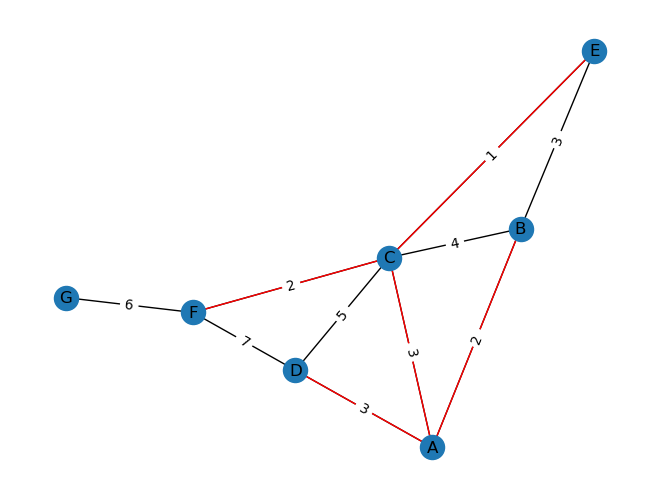

In [6]:
def find_parent(parent, node):
    if parent[node] == node:
        return node

    parent[node] = find_parent(parent, parent[node])
    return parent[node]


def kruskal(graph: list) -> list:
    from_nodes = {node[0] for node in graph}
    to_nodes = {node[1] for node in graph}
    nodes = from_nodes | to_nodes

    result = []

    parent = {node: node for node in nodes}

    connections = sorted(graph, key=lambda x: x[2])

    for connection in connections:
        # check for circular dependency
        from_parent = find_parent(parent, connection[0])
        to_parent = find_parent(parent, connection[1])

        if from_parent == to_parent:
            continue

        result.append(connection)
        # can be improved by using a rank system
        parent[from_parent] = to_parent

    return result


# node_1 to node_2 with weight
G = [
    ["A", "B", 2],
    ["A", "C", 3],
    ["A", "D", 3],
    ["B", "C", 4],
    ["B", "E", 3],
    ["C", "D", 5],
    ["C", "E", 1],
    ["C", "F", 2],
    ["D", "F", 7],
    ["F", "G", 6],
]


selected = kruskal(G)
draw_graph(G, selected)